<a href="https://colab.research.google.com/github/asadalam1/Practice-/blob/main/Original_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing libraries and Mounting files


In [1]:
#Importing Various libraries to use 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Mounting Data 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading csv files
file_dir='/content/drive/MyDrive/Temp Projects/Play Store App Review Analysis/'
play_store_app_df=pd.read_csv(file_dir +'Play Store Data.csv')
review_df=pd.read_csv(file_dir + 'User Reviews.csv')



#Cleaning The data 


In [5]:
#Creating a copy of our original data frame
df=play_store_app_df.copy()
rdf=review_df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [9]:
#Removing Duplicate rows of our data frame on App column

#df[df['App']=='Candy Crush Saga']
df.drop_duplicates(subset=['App'],keep='first',inplace=True,ignore_index=True)


In [10]:
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [12]:
df['Type'].value_counts()
    


Free    8902
Paid     756
0          1
Name: Type, dtype: int64

In [13]:
df[df['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
#Removing the above gibbrish entry
df.drop(9300,axis=0,inplace=True)
df.reset_index(inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [16]:
df[df['Type'].isna()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,8028,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [17]:
#Since price is zero we have to set NaN type value as Free
df.loc[8028,'Type']='Free'
df.loc[8028]


index                                  8028
App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 8028, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [19]:
#Checking null values of 'Current Ver' and 'Android Ver' columns
df[df['Current Ver'].isna()]


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,5772,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,6287,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,6360,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,6671,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,9170,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [20]:
#Setting the null values of columns 'Current Ver' and 'Android Ver' as 'Missing'
df['Current Ver'].fillna('Missing',inplace=True)
df['Android Ver'].fillna('Missing',inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [22]:
#Setting the null values of column 'Rating' with the average rating 
df.loc[df['Rating'].isna(),'Rating']= df.loc[~df['Rating'].isna(),'Rating'].mean()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [24]:
#Creating a column named 'Price in $' whose entries are float value of price without $ sign

def price_without_dollar(price):
  '''Convert price in string with dollar to float without dollar sign'''
  price=price[1:]
  return float(price)

#def return_zero():
  #return 0.0


df['Price in $']=df.loc[df['Price']!='0','Price'].apply(lambda x: price_without_dollar(x))
df['Price in $'][df['Price in $'].isna()]=0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [25]:
df[df['Type']=='Free'].head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


In [26]:
df[df['Type']=='Paid'].head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
233,233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,4.99
234,234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,4.99


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
 14  Price in $      9659 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+ MB


In [28]:
#Changing the data type of Reviews column to int type 
df['Reviews']=df['Reviews'].astype(int)

In [29]:
df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
 14  Price in $      9659 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 1.1+ MB


In [31]:
rdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [32]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [33]:
rdf['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

In [34]:
df[df['App']=='Angry Birds Classic']

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
1382,1382,Angry Birds Classic,GAME,4.4,5566669,97M,"100,000,000+",Free,0,Everyone,Arcade,"May 24, 2018",7.9.3,4.1 and up,0.0


#Question1: What percentage of apps are paid and free.

In [35]:
app_type_df=df['Type'].value_counts()
app_type_df


Free    8903
Paid     756
Name: Type, dtype: int64

Text(0.5, 1.0, 'Free vs Paid Apps Percentage ')

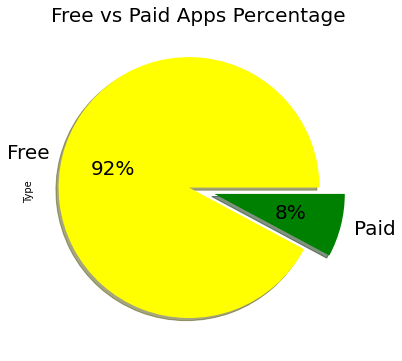

In [36]:

plt.rcParams['figure.figsize']=(6,6)
type_pie=app_type_df.plot(kind='pie',autopct='%1.0f%%',fontsize=20,shadow=True, colors=['yellow','green'],explode=(0.10,0.10))
type_pie.set_title("Free vs Paid Apps Percentage ",fontsize=20)

In [37]:
#here we can see that most of the apps are free and only 8% of apps are paid.

#Question2: Count of apps in each category:


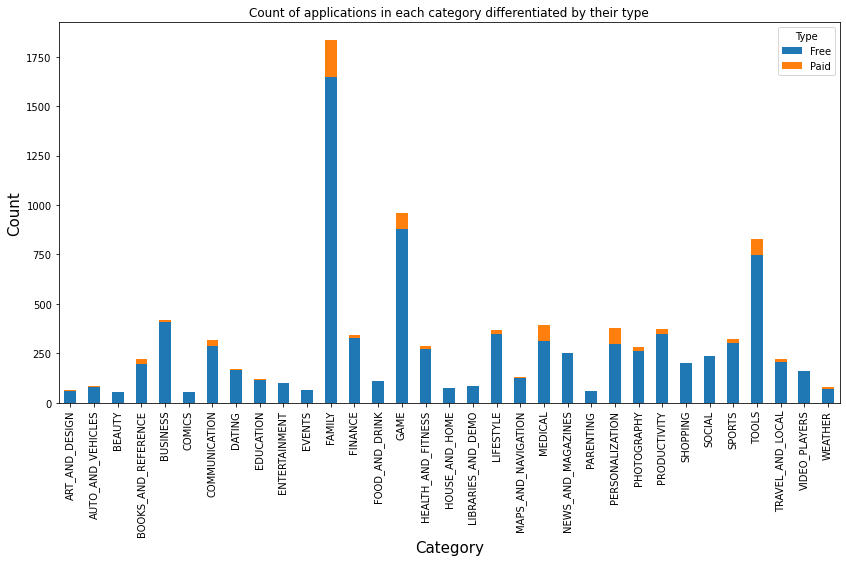

In [38]:
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Games, Tools and Business are Free. At the same time Family, Medical, Games, Personalization and Tools had the biggest number of paid apps available for download.

In [39]:
#In general
x=df['Category'].value_counts()
y=df['Category'].value_counts().index
print(x)
print(y)


FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64
Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', '

Text(0.5, 1.0, 'Category Wise Count of Apps on Google Playstore')

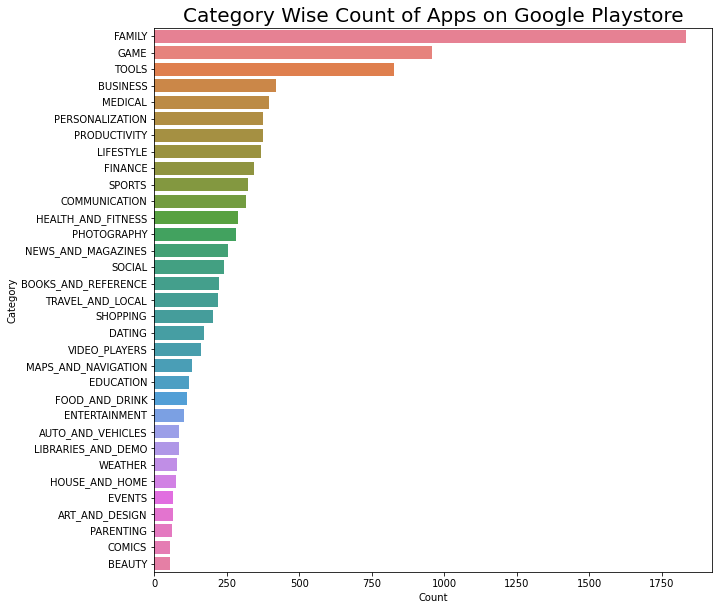

In [40]:
xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Category Wise Count of Apps on Google Playstore", fontsize = 20)

Here we can see that Family category has the most no. of apps followed by Games , Tools and Business.

In [41]:
#For Free Apps
#We create a new dataframe which contains data of only free apps
free_apps_df=df[df['Type']=='Free']
free_apps_df.shape


(8903, 15)

Text(0.5, 1.0, 'Category Wise Count of Free Apps on Google Playstore')

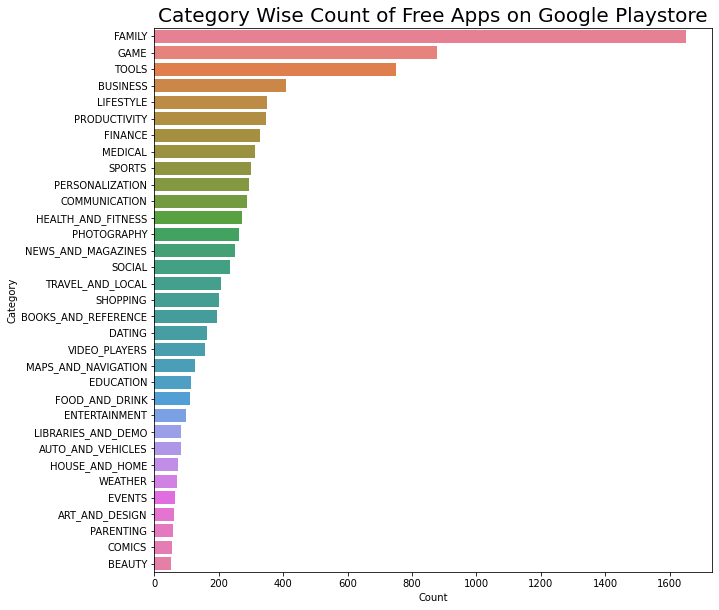

In [42]:
x=free_apps_df['Category'].value_counts()
y=free_apps_df['Category'].value_counts().index

xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Category Wise Count of Free Apps on Google Playstore", fontsize = 20)


Here we can see that Family category has the most no. of Free apps followed by Games , Tools and Business .

In [43]:
#For Paid Apps
#We create a new dataframe which contains data of only paid apps
paid_apps_df=df[df['Type']=='Paid']
paid_apps_df.shape

(756, 15)

Text(0.5, 1.0, 'Category Wise Count of Paid Apps on Google Playstore')

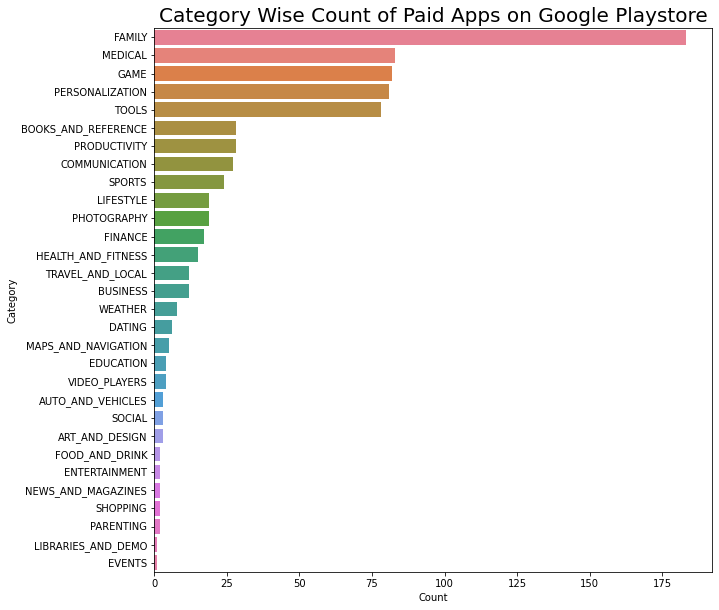

In [44]:
x=paid_apps_df['Category'].value_counts()
y=paid_apps_df['Category'].value_counts().index

xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Category Wise Count of Paid Apps on Google Playstore", fontsize = 20)

Here we can see that Family category has the most no. of Paid apps, but it is followed by Medical, Game, Personalization, and Tools, which has approx same no of apps .

#Question 3: Average Rating of Free and paid apps.


We plotted the probablity distribution graph for ratings of Free and Paid apps.


In [45]:
#For Free Apps
free_apps_df['Rating'].mean()


4.167384211221347

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


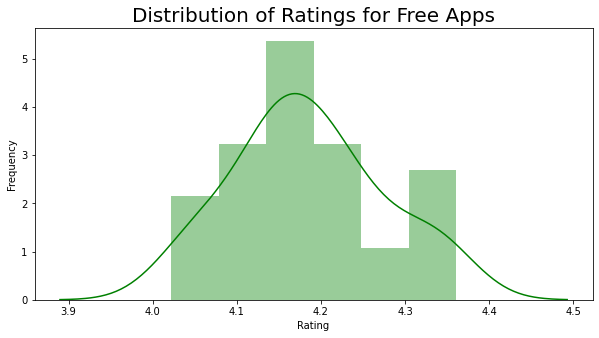

In [46]:
free_app_ratings_df = free_apps_df.groupby(['Category'])[['Rating']].mean()


plt.figure(figsize=(10,5))
g = sns.distplot(free_app_ratings_df.Rating, color="Green",hist=True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings for Free Apps',size = 20)
plt.show()

In [47]:
#For paid apps
paid_apps_df['Rating'].mean()


4.242239342458961

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


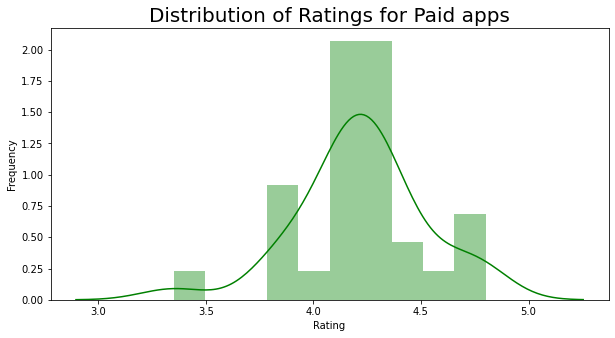

In [48]:
paid_app_ratings_df = paid_apps_df.groupby(['Category'])[['Rating']].mean()

plt.figure(figsize=(10,5))
g = sns.distplot(paid_app_ratings_df.Rating, color="Green",hist=True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings for Paid apps',size = 20)
plt.show()

Here we can see that the average ratings of free apps as approx 4.1 out of 5 and for paid apps it is approx 4.2 out of 5. Thus we can conclude that paid apps are slightly better rated as compared to free apps.

#Question 4: Content wise no. of Free and Paid Apps

In [49]:
#Checking the number of apps in free apps dataframe as per its content
free_apps_df['Content Rating'].value_counts()


Everyone           7248
Teen                984
Mature 17+          375
Everyone 10+        291
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Wise Count of Free Apps on Google Playstore')

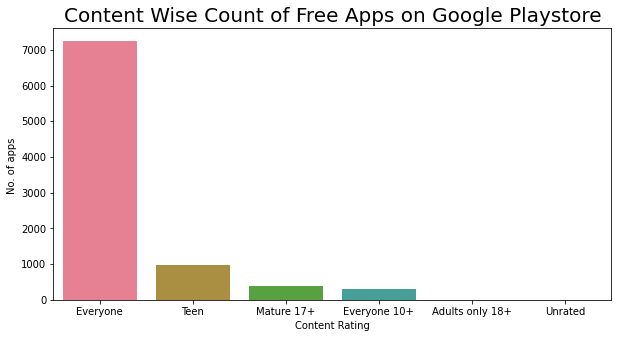

In [50]:
#Plotting the bar plot 
y=free_apps_df['Content Rating'].value_counts()             #It gives series
x=free_apps_df['Content Rating'].value_counts().index       #it gives index of that series


xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,5))
plt.xlabel("Content Rating")
plt.ylabel("No. of apps ")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Content Wise Count of Free Apps on Google Playstore", fontsize = 20)

In [51]:
#Checking the number of apps in paid apps dataframe as per its content
paid_apps_df['Content Rating'].value_counts()

Everyone        655
Teen             52
Everyone 10+     31
Mature 17+       18
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Wise Count of paid Apps on Google Playstore')

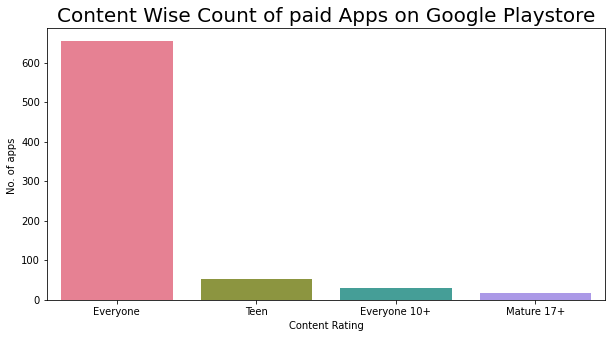

In [52]:
#Plotting the bar plot 
y=paid_apps_df['Content Rating'].value_counts()             #It gives series
x=paid_apps_df['Content Rating'].value_counts().index       #it gives index of that series


xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,5))
plt.xlabel("Content Rating")
plt.ylabel("No. of apps ")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Content Wise Count of paid Apps on Google Playstore", fontsize = 20)

#Question 5 : Which are the Ctegories that are getting installed the most

In [53]:
#Removing '+' from the values of number of installs and converting it to numeric

df['Installs'] = df['Installs'].apply(lambda x: x.rstrip('+'))
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))


In [54]:
df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
 14  Price in $      9659 non-null   float64
dtypes: float64(2), int64(3), object(10)
memory usage: 1.1+ MB


In [56]:
#For No of apps Available to Download in Each category
x=df['Category'].value_counts()
y=df['Category'].value_counts().index
print(x)
print(y)

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64
Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', '

Text(0.5, 1.0, 'Category Wise Count of Apps on Google Playstore')

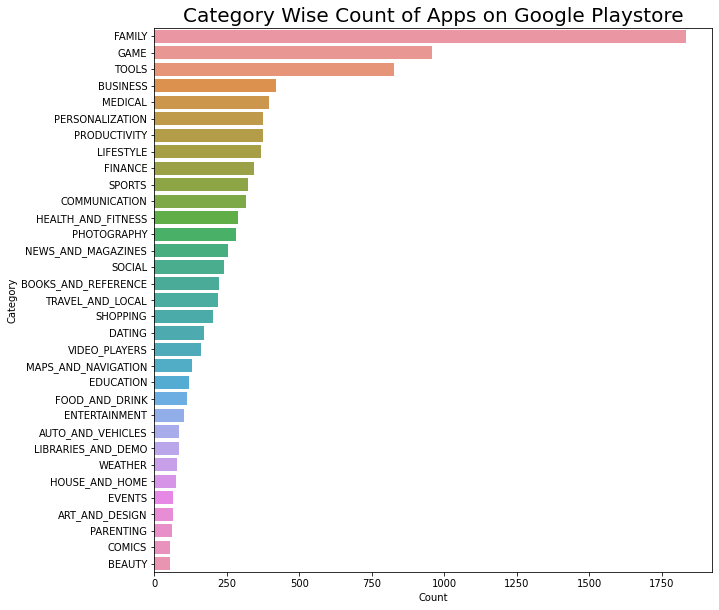

In [57]:
xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")


graph = sns.barplot(x = xsis, y = ysis)
graph.set_title("Category Wise Count of Apps on Google Playstore", fontsize = 20)

In [58]:
df['Installs'].min(), df['Installs'].max()

(0, 1000000000)

In [60]:
df.head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $,log_installs
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,13.287712
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,18.931569


In [61]:
#Which are the Ctegories that are getting installed the most
top_category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_installs = df.groupby(['Category'])[['Installs']].sum()
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


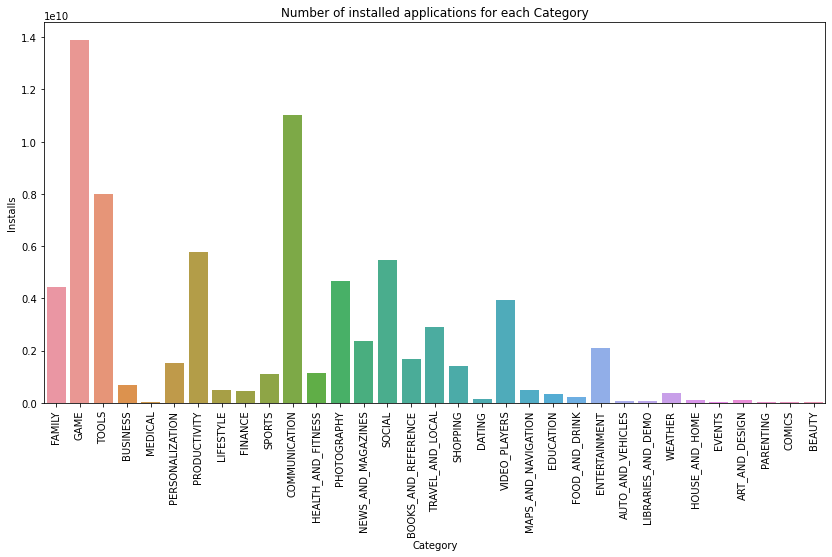

In [62]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()
#1e10=10^10 (Ten Raised to the power 10)

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games, Tools, and Business but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communicatin, Tools and productivity.

Here we can see that no of apps available in communication is very less as compared to to user demands as its installs are very high.

#Question 6 : How does size impact the number of installs of any application

In [64]:
# Converting KB to MB 
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          9659 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9659 non-null   object 
 13  Android Ver     9659 non-null   object 
 14  Price in $      9659 non-null   float64
 15  log_installs    9659 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 1.2+ MB


In [67]:
df.head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $,log_installs
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,13.287712
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,18.931569


As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column to dataframe, which is the log of number of installs.

In [68]:
df['log_installs'] = np.log10(df['Installs'])
categoty_type_installs =df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


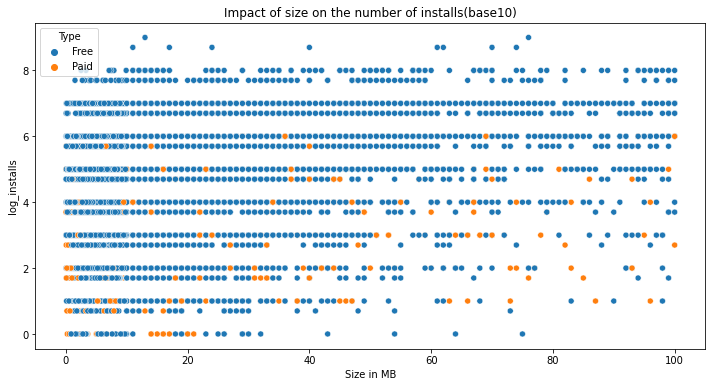

In [70]:
plt.figure(figsize=(12,6))
plt.title("Impact of size on the number of installs(base10)")
sns.scatterplot(df['Size'], df['log_installs'], hue=df['Type'])
plt.xlabel("Size in MB")
plt.show()

It is clear from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.


#Histogram of no. of apps vs its size in the Playstore.

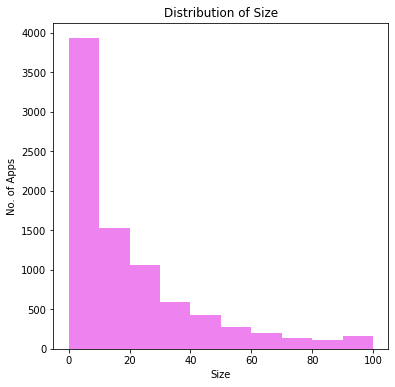

In [87]:
plt.xlabel("Size")
plt.ylabel("No. of Apps")
plt.title("Distribution of Size")
plt.hist(df['Size'],color='violet');
plt.show()